In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime

In [3]:
df = pd.read_csv("tempHumid-2020-03-18.log",
                    names=['Datetime', 'etc'],
                    header=None, index_col='Datetime')
df

,etc
Datetime,
2020-03-18 17:22:02,075 INFO 2351 Temp=26.0C Humidity=36.0%
2020-03-18 17:22:14,143 INFO 2351 Temp=27.0C Humidity=39.0%
2020-03-18 17:23:29,299 INFO 2351 Temp=21.0C Humidity=39.0%
2020-03-18 17:23:30,299 INFO 2351 Temp=30.0C Humidity=40.0%
2020-03-18 17:23:31,299 INFO 2351 Temp=22.0C Humidity=15.0%
2020-03-18 17:24:32,299 INFO 2351 Temp=23.0C Humidity=19.0%
2020-03-18 17:24:33,299 INFO 2351 Temp=20.0C Humidity=26.0%
2020-03-18 17:24:34,299 INFO 2351 Temp=27.0C Humidity=30.0%


In [4]:
df[['etc1', 'etc2', 'etc3', 'Temp', 'Humid']] = df['etc'].str.split(' ', n=5, expand=True)
df

,etc,etc1,etc2,etc3,Temp,Humid
Datetime,,,,,,
2020-03-18 17:22:02,075 INFO 2351 Temp=26.0C Humidity=36.0%,075,INFO,2351,Temp=26.0C,Humidity=36.0%
2020-03-18 17:22:14,143 INFO 2351 Temp=27.0C Humidity=39.0%,143,INFO,2351,Temp=27.0C,Humidity=39.0%
2020-03-18 17:23:29,299 INFO 2351 Temp=21.0C Humidity=39.0%,299,INFO,2351,Temp=21.0C,Humidity=39.0%
2020-03-18 17:23:30,299 INFO 2351 Temp=30.0C Humidity=40.0%,299,INFO,2351,Temp=30.0C,Humidity=40.0%
2020-03-18 17:23:31,299 INFO 2351 Temp=22.0C Humidity=15.0%,299,INFO,2351,Temp=22.0C,Humidity=15.0%
2020-03-18 17:24:32,299 INFO 2351 Temp=23.0C Humidity=19.0%,299,INFO,2351,Temp=23.0C,Humidity=19.0%
2020-03-18 17:24:33,299 INFO 2351 Temp=20.0C Humidity=26.0%,299,INFO,2351,Temp=20.0C,Humidity=26.0%
2020-03-18 17:24:34,299 INFO 2351 Temp=27.0C Humidity=30.0%,299,INFO,2351,Temp=27.0C,Humidity=30.0%


In [5]:
del df['etc']

In [6]:
del df['etc1']

In [7]:
del df['etc2']

In [8]:
del df['etc3']

In [9]:
df['Temp'] = df['Temp'].str.slice(start=5, stop=-1)

In [10]:
df['Temp'] = df['Temp'].apply(pd.to_numeric)

In [11]:
df['Humid'] = df['Humid'].str.slice(start=9, stop=-1)

In [12]:
df['Humid'] = df['Humid'].apply(pd.to_numeric)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 2020-03-18 17:22:02 to 2020-03-18 17:24:34
Data columns (total 2 columns):
Temp     8 non-null float64
Humid    8 non-null float64
dtypes: float64(2)
memory usage: 192.0+ bytes


In [14]:
df.index = pd.to_datetime(df.index)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8 entries, 2020-03-18 17:22:02 to 2020-03-18 17:24:34
Data columns (total 2 columns):
Temp     8 non-null float64
Humid    8 non-null float64
dtypes: float64(2)
memory usage: 192.0 bytes


In [16]:
df

,Temp,Humid
Datetime,,
2020-03-18 17:22:02,26.0,36.0
2020-03-18 17:22:14,27.0,39.0
2020-03-18 17:23:29,21.0,39.0
2020-03-18 17:23:30,30.0,40.0
2020-03-18 17:23:31,22.0,15.0
2020-03-18 17:24:32,23.0,19.0
2020-03-18 17:24:33,20.0,26.0
2020-03-18 17:24:34,27.0,30.0


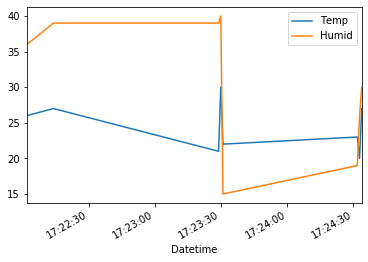

In [26]:
df.plot()

Datetime
2020-03-18 17:22:00    AxesSubplot(0.125,0.125;0.775x0.755)
2020-03-18 17:23:00    AxesSubplot(0.125,0.125;0.775x0.755)
2020-03-18 17:24:00    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

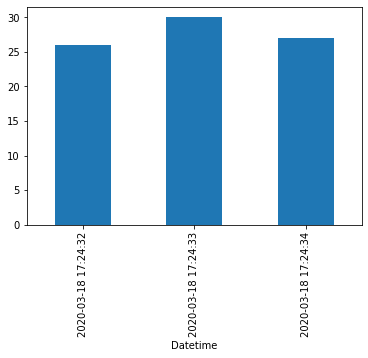

In [28]:
df['Temp'].resample('min').plot(kind='bar')